# INFS 770 - Advanced Data Mining Application
## Assignment 1
### John Herbert

## 0: Import Libraries

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC

## 1: Import Data

In [17]:
# Importing Data

magic = 'magic04.data'

# Define column names
var_names = [
    'fLength',  # major axis of ellipse [mm]
    'fWidth',   # minor axis of ellipse [mm] 
    'fSize',    # 10-log of sum of content of all pixels [in #phot]
    'fConc',    # ratio of sum of two highest pixels over fSize  [ratio]
    'fConc1',   # ratio of highest pixel over fSize  [ratio]
    'fAsym',    # distance from highest pixel to center, projected onto major axis [mm]
    'fM3Long',  # 3rd root of third moment along major axis  [mm] 
    'fM3Trans', # 3rd root of third moment along minor axis  [mm]
    'fAlpha',   # angle of major axis with vector to origin [deg]
    'fDist',    # distance from origin to center of ellipse [mm]
    'class',    # gamma (signal), hadron 
]

# Read from .data file
magic_df = pd.read_csv(magic,sep=',',names=var_names)
magic_df2 = magic_df.copy()
# List variable data types
magic_df.dtypes

fLength     float64
fWidth      float64
fSize       float64
fConc       float64
fConc1      float64
fAsym       float64
fM3Long     float64
fM3Trans    float64
fAlpha      float64
fDist       float64
class        object
dtype: object

In [18]:
# Running the top 5 data records to confirm data was imported correctly
magic_df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


## 2: Dependent Variable Count

In [19]:
# Value count for target of dependent variable - class
magic_df['class'].value_counts()

g    12332
h     6688
Name: class, dtype: int64

## 3: Histogram of Predictor Variables

array([[<AxesSubplot:title={'center':'fLength'}>,
        <AxesSubplot:title={'center':'fWidth'}>,
        <AxesSubplot:title={'center':'fSize'}>],
       [<AxesSubplot:title={'center':'fConc'}>,
        <AxesSubplot:title={'center':'fConc1'}>,
        <AxesSubplot:title={'center':'fAsym'}>],
       [<AxesSubplot:title={'center':'fM3Long'}>,
        <AxesSubplot:title={'center':'fM3Trans'}>,
        <AxesSubplot:title={'center':'fAlpha'}>],
       [<AxesSubplot:title={'center':'fDist'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

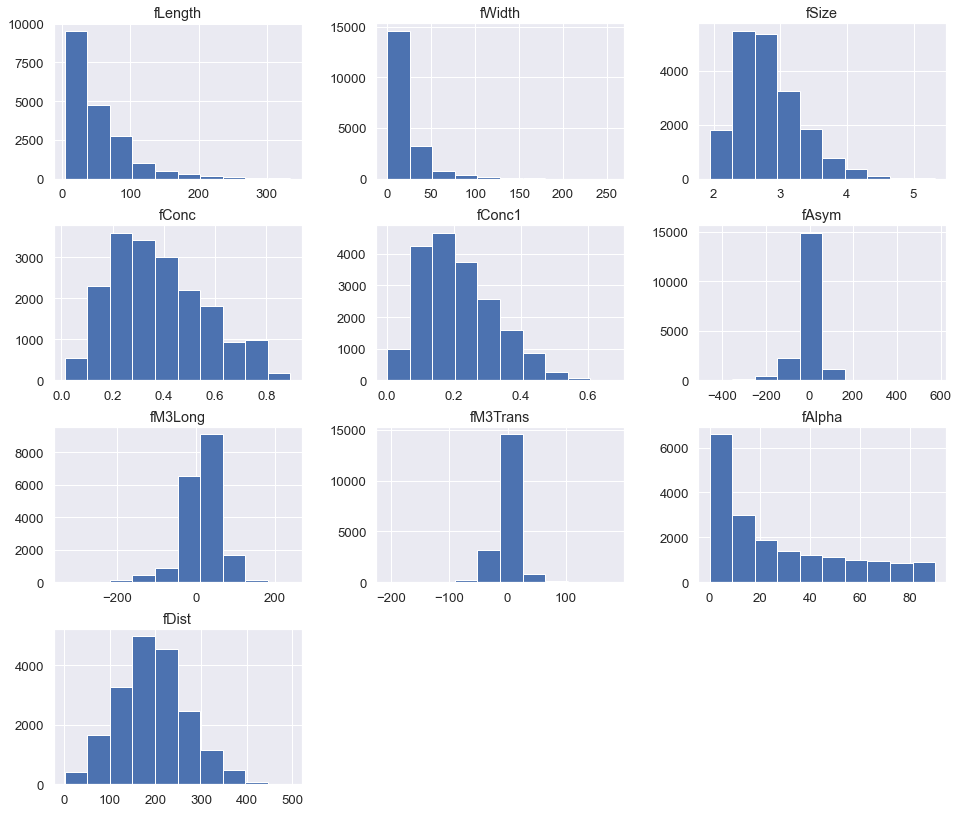

In [20]:
# Creating a subset of the predictor variables and plotting histograms for each
predictors = [
    'fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long', 
    'fM3Trans','fAlpha','fDist',    
]

magic_df[predictors].hist(figsize=(16,14))

## 4: Stats for Predictor Variables

In [21]:
# Gathering descriptive statistics on each of the independent variables
magic_df[predictors].describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


## 5: Training\Validation Split

In [22]:
# First I will convert the class variable to a dummy variable with g or gamma = 1
# and g or hadron = 0.
# I then output a value count to confirm that the formula worked correctly
target = pd.get_dummies(magic_df['class'])
target.columns = ['class','h']
target = target['class']
target.value_counts()

1    12332
0     6688
Name: class, dtype: int64

In [23]:
# First I will convert the class variable to a dummy variable with g or gamma = 1
# and g or hadron = 0.

# Splitting the data into test and validation sub set for the predictors and the target variables
# Data was split with 60% in training and 40% in validation sets
X_train,X_test,y_train,y_test = train_test_split(magic_df[predictors],target,
                                test_size=0.4,random_state=42)

# Running the shape of each new set created to confirm the correct number of records were produced
print('X Training Set Shape:',X_train.shape)
print('X Validation Set Shape:',X_test.shape)
print('y Training Set Shape:',y_train.shape)
print('y Validation Set Shape:',y_test.shape)

X Training Set Shape: (11412, 10)
X Validation Set Shape: (7608, 10)
y Training Set Shape: (11412,)
y Validation Set Shape: (7608,)


## 6: Validation Description

Uses of the validation\cross validation set:
1. **Detect overfitting**. Since the model uses a different set to train, the validation set is used to confirm the model will work well with new data, and not just  the training dataset.
2. **Variable Selection**. If a model has a lot of predictors, it can generate a lot of noise and also contain multicolinearity (predictor variables that are correlated to each other) that make variables unnecessary. 
3. **Model comparison**. This is used to compare models with untouched data to see which model preforms the best (i.e. minimizes cost the most).
4. **Hyperparameter tuning** Most models have hyperparameters that can be changed to determine at what level each hyperparameter produces the lowest cost function. This can be done through gradient descent or stochastic gradient descent.

## 7: Logistic Regression and ROC AUC 

In [24]:
# Using the logistic regression functions in sklearn to create the mode,
# then fitting the model to the training dataset
logr = LogisticRegression(random_state=42,max_iter=10000)
logfit = logr.fit(X_train,y_train)
logpred = logfit.predict(X_test)

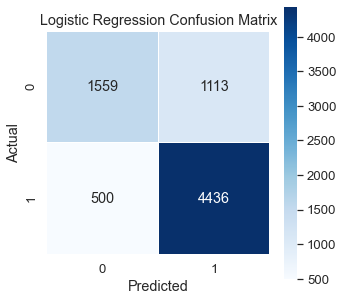

In [25]:
# Using the confusion matrix metric function in sklearn 
# and seaborn heat map to visualize the results
cm = metrics.confusion_matrix(y_test,logpred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic Regression Confusion Matrix')
sns.set(font_scale=1.2)

In [26]:
# Using the classification report metric in sklearn
for line in metrics.classification_report(y_test,logpred).split('\n'):
    print(line)

              precision    recall  f1-score   support

           0       0.76      0.58      0.66      2672
           1       0.80      0.90      0.85      4936

    accuracy                           0.79      7608
   macro avg       0.78      0.74      0.75      7608
weighted avg       0.78      0.79      0.78      7608



In [27]:
# Using the roc_auc function is sklearn to cite the ROC score of the model
roc_pred = logr.predict_proba(X_test)[:,1]
roc = metrics.roc_auc_score(y_test, roc_pred)
print('AUC Score =',round(roc,3))

AUC Score = 0.837


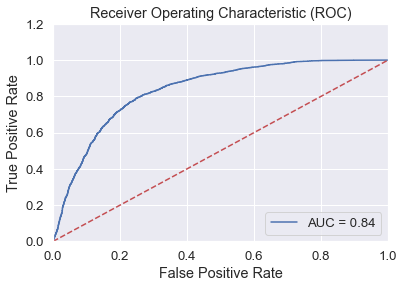

In [28]:
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test,roc_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve using matplotlib
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 8: SVM Explanation

SVM stands for Supprt Vector Machine. It is a algorithm that splits categories of data using a decision boundary and support vectors that touch each category. The space between the decision boundary and each of the support vectors is called a margin, and the larger the margin the better fitted the model. The model can be either linear or non-linear (3 dimensional seperated by a plane if there is not a clear seperation from a linear seperator) and the margins can be hard (no points can be inside of them) or soft (points are allowed in the margin, which is common practice). The seperator, or decision boundary is calculated using a kernel, which can be either a linear, polynomial, RBF, Sigmoid, or a precomputed formula or function.

## 9: Fitting a SVM Model

In [29]:
# First, I created a list of all the C values I will iterate in my for loop.
# Then I will run the for loop abd run a SVM model with the new C value and print its classification reports
# and AUC Score for each
Clist = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for c in Clist:
    svc = SVC(C=c)
    svcfit = svc.fit(X_train,y_train)
    svcpred = svcfit.predict(X_test)

    print('C =',c)
    roc2 = metrics.roc_auc_score(y_test, svcpred)
    print('AUC Score for C = ',c,'is ',round(roc2,3))
    for line in metrics.classification_report(y_test,svcpred).split('\n'):
        print(line)

C = 0.1
AUC Score for C =  0.1 is  0.739
              precision    recall  f1-score   support

           0       0.86      0.53      0.65      2672
           1       0.79      0.95      0.86      4936

    accuracy                           0.80      7608
   macro avg       0.82      0.74      0.76      7608
weighted avg       0.81      0.80      0.79      7608

C = 0.2
AUC Score for C =  0.2 is  0.747
              precision    recall  f1-score   support

           0       0.86      0.54      0.66      2672
           1       0.79      0.95      0.87      4936

    accuracy                           0.81      7608
   macro avg       0.83      0.75      0.76      7608
weighted avg       0.82      0.81      0.79      7608

C = 0.3
AUC Score for C =  0.3 is  0.753
              precision    recall  f1-score   support

           0       0.86      0.56      0.68      2672
           1       0.80      0.95      0.87      4936

    accuracy                           0.81      7608
   ma

## 10: C Explanation

The model with the highest C or Support Vector Classification is C = 1 with a score of 0.766.

The C parameter sets how much weight to give to minimize error. The lower the number, the more you will ignore the error of the boundaries. So it is not surprising that the higher number is able to classify points in the dataset as the model chooses a smaller margin hyperplane.

## 11: Random Forest Model 

In [30]:
rfm = RFC(random_state=42)
rfmfit = rfm.fit(X_train,y_train)
rfmpred = rfmfit.predict(X_test)

# roc_pred = logr.predict_proba(X_test)[:,1]
rfm_roc = metrics.roc_auc_score(y_test, rfmpred)
print('THE AUC score for the model = ',round(rfm_roc,3),'\n')

for line in metrics.classification_report(y_test,rfmpred).split('\n'):
    print(line)

THE AUC score for the model =  0.854 

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      2672
           1       0.88      0.94      0.91      4936

    accuracy                           0.88      7608
   macro avg       0.88      0.85      0.86      7608
weighted avg       0.88      0.88      0.88      7608



## 12: Random Forest Explanation

A random forest algorithm is a ensemble method model that uses many decision trees (the exact amount can be set a hyperparameter in the model) that are pooled together to make a final prediction. Each individual tree within the random forest will yield a class prediction, then a voting method is used in the final model to come up with the final prediction. Bagging is used to randomly select the variables within each tree, to create many low correlated trees, weaker trees, however in conjunction together they generally yield  strong results, as we see in this model where it is the strongest model of all the models tested. However, if we were to adjust to hyperparameters of each model, another may yield best results. In addition, bootstrapping method is used to select training data for each of the classifiers.